In [1]:
from numpy import *
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
import pandas as pd
import seaborn as sns 

In [2]:
columns=['SST','LSM','VIR']
df=pd.read_csv('C:/Users/srabh/Desktop/testRL.csv',names=columns,sep=';')
df






,SST,LSM,VIR
Mcdo,300,0.003,1177
Delta,450,0.880,46916
Uber,370,0.720,16547


In [3]:
df=df.to_numpy()

In [4]:
df

array([[3.0000e+02, 3.0000e-03, 1.1770e+03],
       [4.5000e+02, 8.8000e-01, 4.6916e+04],
       [3.7000e+02, 7.2000e-01, 1.6547e+04]])

In [11]:
xtrain=df[0:2,0:2]
print(xtrain)
xtest=df[2,0:2]
#xtest=np.reshape(xtest, (2,1))
#print(xtest.shape)
print(xtest)
ytrain=df[0:2,2:3]
print(ytrain)
ytest=df[2,2:3]
print(ytest)

[[3.0e+02 3.0e-03]
 [4.5e+02 8.8e-01]]
[370.     0.72]
[[ 1177.]
 [46916.]]
[16547.]


In [12]:
xtrain2=df[:,0:2]
ytrain2=df[:,2:3]
print(xtrain2)
print(ytrain2)

[[3.0e+02 3.0e-03]
 [4.5e+02 8.8e-01]
 [3.7e+02 7.2e-01]]
[[ 1177.]
 [46916.]
 [16547.]]


In [13]:
#ones=np.ones(len(xtrain2))
ones=np.ones(len(xtrain2))

#x=np.column_stack((ones,xtrain2))
x=np.column_stack((ones,xtrain2))

In [14]:
print(x)

[[1.0e+00 3.0e+02 3.0e-03]
 [1.0e+00 4.5e+02 8.8e-01]
 [1.0e+00 3.7e+02 7.2e-01]]


In [15]:
x.shape

(3, 3)

In [16]:
#xtest=np.reshape(xtest, (1,2))

In [17]:
#print(xtest)

In [18]:
print(np.dot(x.T,x))

[[3.000000e+00 1.120000e+03 1.603000e+00]
 [1.120000e+03 4.294000e+05 6.633000e+02]
 [1.603000e+00 6.633000e+02 1.292809e+00]]


In [19]:
print(np.linalg.inv(np.dot(x.T,x)))

[[ 5.40492936e+01 -1.80535949e-01  2.56097208e+01]
 [-1.80535949e-01  6.14253527e-04 -9.13013736e-02]
 [ 2.56097208e+01 -9.13013736e-02  1.58629918e+01]]


In [20]:
theta= np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T, ytrain2))
#theta= np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T, scaled_VIR))
theta=theta.T

In [21]:
print('Gamma:')
print(theta)


Gamma:
[[-124297.93955806     418.44395581  -19415.72790295]]


In [25]:
Ychapeau= np.dot(theta,x)
print(Ychapeau)

[[-1.43295224e+05 -4.42849014e+07 -1.39839872e+04]]


<IPython.core.display.Javascript object>


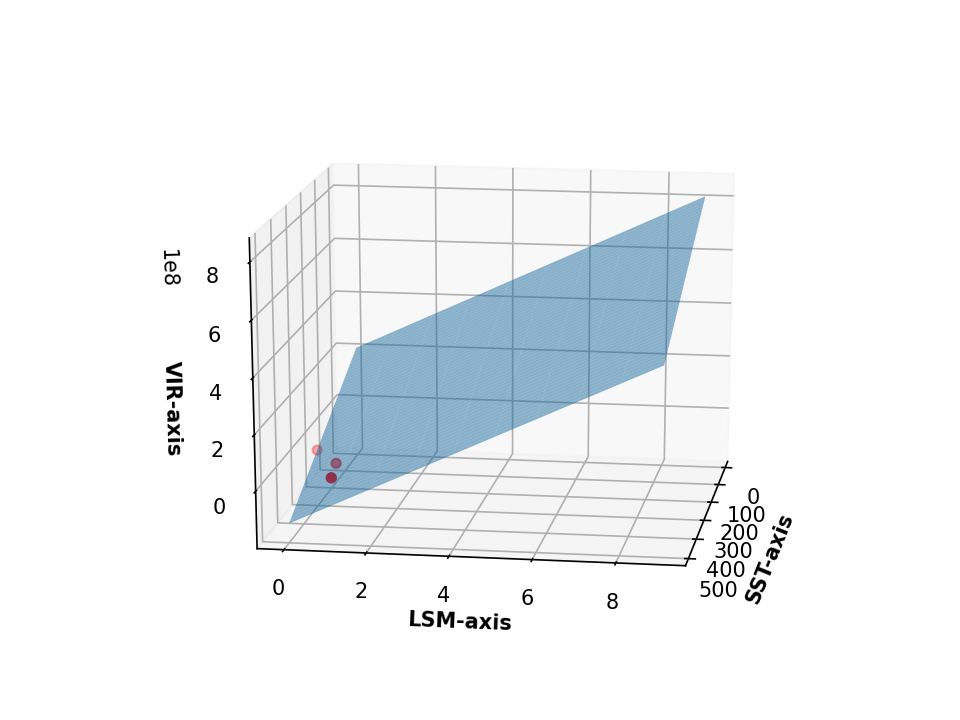

In [303]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#print(Ychapeau.T)
#print(xtrain2)

x=np.linspace(0,1000,num=100)
y=np.linspace(0,1,num=100)

a=np.concatenate((xtrain2,Ychapeau.T),axis=1)
#b=np.concatenate((xtrain2,Ychapeau),axis=1)

x = df[:,0:1]
y = df[:,1:2]
z = df[:,2:3]


p0, p1, p2 = a
x0, y0, z0 = p0
x1, y1, z1 = p1
x2, y2, z2 = p2

ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]

point  = np.array(p0)
normal = np.array(u_cross_v)

d = -point.dot(normal)

xx, yy = np.meshgrid(range(500), range(10))

z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# plot the surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, z,alpha=0.5)
ax.scatter3D(df[:,0:1], df[:,1:2], df[:,2:3], color = "red")
ax.set_xlabel('SST-axis', fontweight ='bold')
ax.set_ylabel('LSM-axis', fontweight ='bold')
ax.set_zlabel('VIR-axis',fontweight='bold')
#ax.axis(xmin=0,xmax=500)
#ax.axis(ymin=0,ymax=1,10000)
#ax.axis(zmin=0,zmax=100000)
plt.show()